use:  cuda


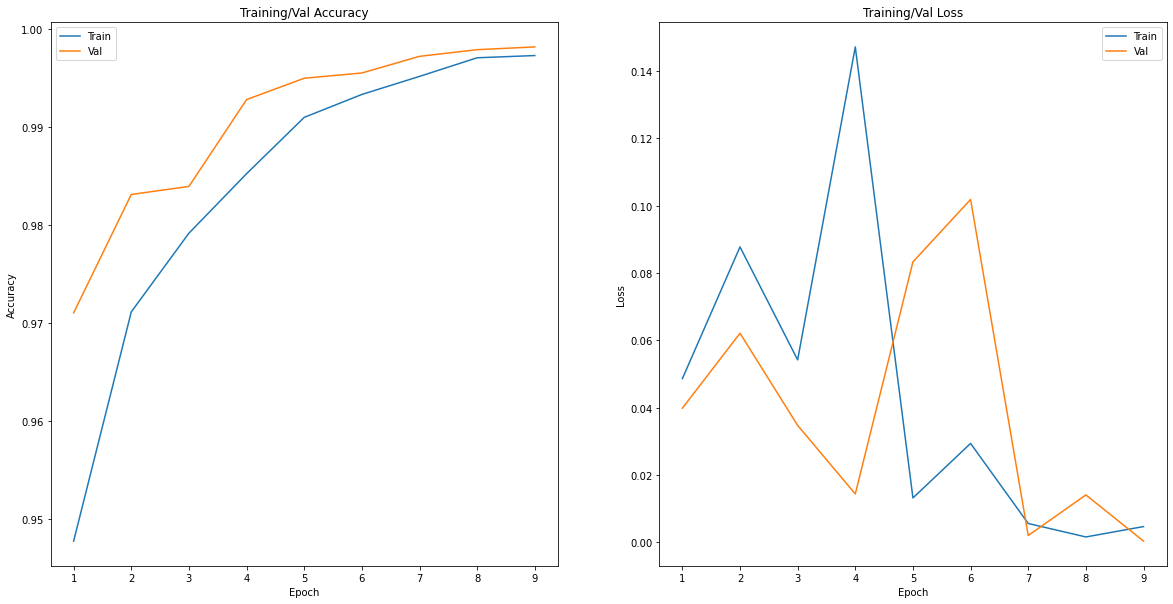

LR : 0.001, Batch Size : 128, 현재 Epoch : 9
Train 정확도 : 0.9973060488700867, Train Loss : 0.0047011543065309525
Val 정확도 : 0.9981884360313416, Val Loss : 0.00039165839552879333
가장 높은 Val 정확도 : 0.9981884360313416


In [35]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from dataset import Dacon
from model import *
from PIL import Image
from tqdm.auto import tqdm, trange
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets

os.environ['CUDA_VISIBLE_DEVICES'] = '0'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('use: ',device)

checkpoint = torch.load('ensemble_cutmix.pt')
train_accuracy_list = checkpoint['train_accuracy']
train_loss_list = checkpoint['train_loss']
val_accuracy_list = checkpoint['val_accuracy']
val_loss_list = checkpoint['val_loss']
learning_rate = checkpoint['learning_rate']
batch_size = checkpoint['batch_size']

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title("Training/Val Accuracy")
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Epoch")
ax[0].plot(range(1, len(train_accuracy_list)+1), train_accuracy_list)
ax[0].plot(range(1, len(val_accuracy_list)+1), val_accuracy_list)
ax[0].legend(['Train', 'Val'])
#ax[0].set_xlim(left=15)
#ax[0].set_ylim(bottom=0.8)

ax[1].set_title("Training/Val Loss")
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Epoch")
ax[1].plot(range(1, len(train_loss_list)+1), train_loss_list)
ax[1].plot(range(1, len(val_loss_list)+1), val_loss_list)
ax[1].legend(['Train', 'Val'])
#ax[1].set_xlim(left=15)
#ax[1].set_ylim(top=1.5)
plt.show()

print(f"LR : {learning_rate}, Batch Size : {batch_size}, 현재 Epoch : {checkpoint['epoch']}")
print(f"Train 정확도 : {train_accuracy_list[-1]}, Train Loss : {train_loss_list[-1]}")
print(f"Val 정확도 : {val_accuracy_list[-1]}, Val Loss : {val_loss_list[-1]}")
print(f"가장 높은 Val 정확도 : {max(val_accuracy_list)}")

In [36]:
a = checkpoint['model_state_dict']['weight']
a

tensor([[ 1.3066,  1.2100, -0.6475,  ...,  1.0732, -0.2025, -0.5373],
        [ 0.1545, -0.7091, -0.7804,  ...,  0.1590,  0.1854,  0.7957],
        [ 2.1892,  0.6281, -1.3512,  ...,  0.6576, -0.8020, -0.1415],
        [ 1.9052,  0.2542, -0.7941,  ...,  1.5904, -0.6913,  0.9770]],
       device='cuda:0')

In [46]:
a = torch.randn((16, 4, 1049))
b = torch.randn((4, 1049))
torch.sum(a*b, dim=1).shape

torch.Size([16, 1049])

In [24]:
import timm
from efficientnet_pytorch import EfficientNet
from pprint import pprint
from torchsummary import summary

name = timm.list_models("*resnext*")
pprint(name)

['cspresnext50',
 'cspresnext50_iabn',
 'ecaresnext26tn_32x4d',
 'gluon_resnext50_32x4d',
 'gluon_resnext101_32x4d',
 'gluon_resnext101_64x4d',
 'gluon_seresnext50_32x4d',
 'gluon_seresnext101_32x4d',
 'gluon_seresnext101_64x4d',
 'ig_resnext101_32x8d',
 'ig_resnext101_32x16d',
 'ig_resnext101_32x32d',
 'ig_resnext101_32x48d',
 'legacy_seresnext26_32x4d',
 'legacy_seresnext50_32x4d',
 'legacy_seresnext101_32x4d',
 'resnext50_32x4d',
 'resnext50d_32x4d',
 'resnext101_32x4d',
 'resnext101_32x8d',
 'resnext101_64x4d',
 'seresnext26_32x4d',
 'seresnext26d_32x4d',
 'seresnext26t_32x4d',
 'seresnext26tn_32x4d',
 'seresnext50_32x4d',
 'seresnext101_32x4d',
 'seresnext101_32x8d',
 'skresnext50_32x4d',
 'ssl_resnext50_32x4d',
 'ssl_resnext101_32x4d',
 'ssl_resnext101_32x8d',
 'ssl_resnext101_32x16d',
 'swsl_resnext50_32x4d',
 'swsl_resnext101_32x4d',
 'swsl_resnext101_32x8d',
 'swsl_resnext101_32x16d',
 'tv_resnext50_32x4d']


* EfficientNet-b1 : 7,856,953
* Vit_base_16 : 86,453,273
* Vit_base_res26d_16 : 101,374,073
* Vit_large_16 : 304,174,105
* Sk_resnext50_32x4d : 27,580,185

In [57]:
for i in list(model.named_parameters()):
    if 'model_A' not in i[0] and 'model_B' not in i[0] and 'model_C' not in i[0] and 'model_D' not in i[0]:
        print(i[1].shape)

torch.Size([4196])
